In [7]:
import os
import tarfile
from six.moves import urllib

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [8]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing_tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [9]:
fetch_housing_data()

In [10]:
import pandas as pd

In [11]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [12]:
housing = load_housing_data()
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
from matplotlib import pyplot as plt
housing.hist(bins=50, figsize = (20,15))
plt.show()

<Figure size 2000x1500 with 9 Axes>

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print ("Train test shape is {0} and Test set shape is {1}".format(train_set.shape,test_set.shape))

Train test shape is (16512, 10) and Test set shape is (4128, 10)


In [23]:
#Check median_income graph above to explain stratified sampling
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"]/1.5) # % by 1.5 to limit no of categories and rounding up using ceil
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household,income_cat
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814,3.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095,3.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214,3.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366,2.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000,3.0


In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
print("Strat train set shape is {0} and Strat test set shape is {1}".format(strat_train_set.shape, strat_test_set.shape))

Strat train set shape is (13209, 14) and Strat test set shape is (3303, 14)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


In [25]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: income_cat, dtype: float64

In [26]:
#Removing income_cat attribute so the data is back to its original state
for s in (strat_train_set, strat_test_set):
    s.drop(["income_cat"], axis=1, inplace=True)
print("Strat train set shape is {0} and Strat test set shape is {1}".format(strat_train_set.shape, strat_test_set.shape))

Strat train set shape is (13209, 13) and Strat test set shape is (3303, 13)


In [27]:
housing = strat_train_set.copy()

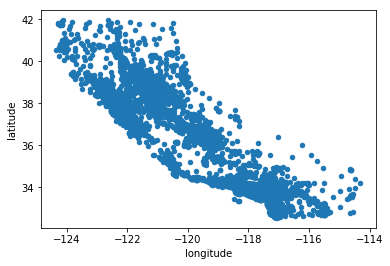

In [16]:
housing = train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")

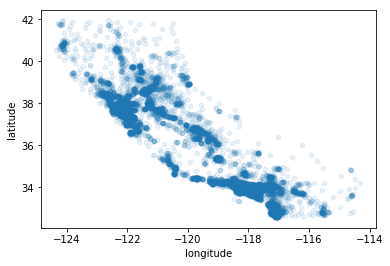

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)

In [18]:

# Go back to slide
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113184dd8>,
      dtype=object)

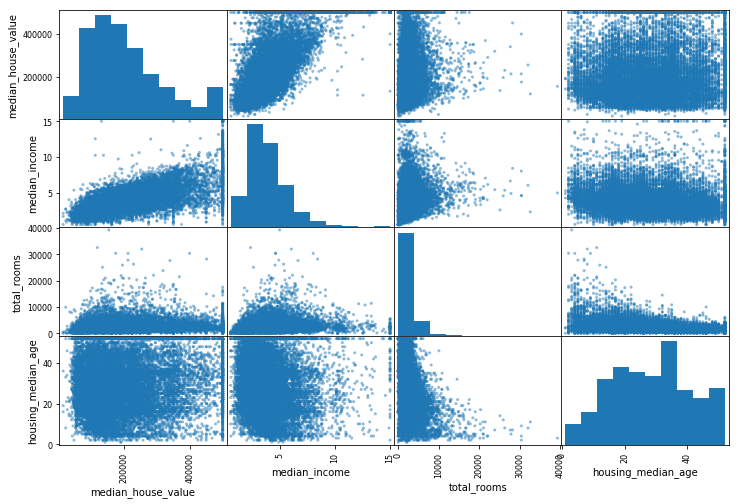

In [19]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [20]:
#Feature Engineering
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000


In [21]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_household     -0.257419
Name: median_house_value, dtype: float64

In [28]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [29]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

In [30]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
print('imputer stats are: {0}'.format(imputer.statistics_))
print('housing median vals: {0}'.format(housing_num.median().values))

imputer stats are: [-1.18300000e+02  3.41000000e+01  3.00000000e+01  2.11000000e+03
  4.39000000e+02  1.17000000e+03  4.12000000e+02  3.47805000e+00
  5.15836464e+00  2.06111264e-01  2.83143584e+00]
housing median vals: [-1.18300000e+02  3.41000000e+01  3.00000000e+01  2.11000000e+03
  4.39000000e+02  1.17000000e+03  4.12000000e+02  3.47805000e+00
  5.15836464e+00  2.06111264e-01  2.83143584e+00]


In [31]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household
0,-117.84,33.74,25.0,1818.0,577.0,1426.0,532.0,3.2104,3.417293,0.317382,2.680451
1,-121.58,39.79,19.0,2636.0,523.0,1184.0,465.0,2.7863,5.668817,0.198407,2.546237
2,-117.08,32.64,38.0,917.0,256.0,494.0,233.0,1.9241,3.935622,0.279171,2.120172
3,-118.24,33.83,22.0,7368.0,1367.0,4721.0,1342.0,4.8438,5.490313,0.185532,3.517884
4,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,6.802554,0.150866,3.692780


In [36]:
#Handling Text and Categorical attributes
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat.astype(str))
print(housing_cat_encoded)
print(encoder.classes_)

[0 1 4 ... 0 1 5]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN' 'nan']


In [37]:
#Explain problem with above and why we need one-hot-encoding

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

<13209x6 sparse matrix of type '<class 'numpy.float64'>'
	with 13209 stored elements in Compressed Sparse Row format>

In [39]:
# Combining LabelEncoder and OnehotEnconder
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat.astype(str))
housing_cat_1hot

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]])

In [47]:
# Transformation Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
print(type(housing_num_tr))
print(housing_num_tr)

<class 'numpy.ndarray'>
[[ 0.64533662 -0.6699116  -0.38692091 ... -0.82929271  1.92428926
  -0.05442753]
 [-1.47900954  2.46672901 -0.91096612 ...  0.13964034 -0.29408414
  -0.07826305]
 [ 1.07702193 -1.2402099   0.74851039 ... -0.60623216  1.2118272
  -0.15392903]
 ...
 [ 0.38973347 -0.60251271  0.22446517 ...  0.00793692 -0.26437551
  -0.04641794]
 [ 1.93471249 -1.15725742  0.31180604 ...  0.13123651 -0.66169162
   0.36676561]
 [ 0.3840534  -0.48326853  0.04978344 ... -0.08003059 -0.15042672
  -0.02761376]]


In [57]:
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values
    
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [64]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared_num = full_pipeline.fit_transform(housing_num)
print(housing_prepared)
print("Shape is {0}".format(housing_prepared.shape))

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [60]:
import sklearn
sklearn.__version__

'0.19.1'